<a href="https://colab.research.google.com/github/Itskindastrange/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [54]:
import zipfile
import os

zip_file_path = '/content/mall customers.zip'
extract_to_path = 'content'

os.makedirs(extract_to_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Files have been extracted to {extract_to_path}')


Files have been extracted to content


In [55]:
df = pd.read_csv('/content/content/Mall_Customers.csv')

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [63]:
df.drop(['CustomerID','Gender','Age'],axis=1,inplace=True)

In [83]:
X = df.iloc[:,0:].values

In [59]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [60]:
df.tail()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

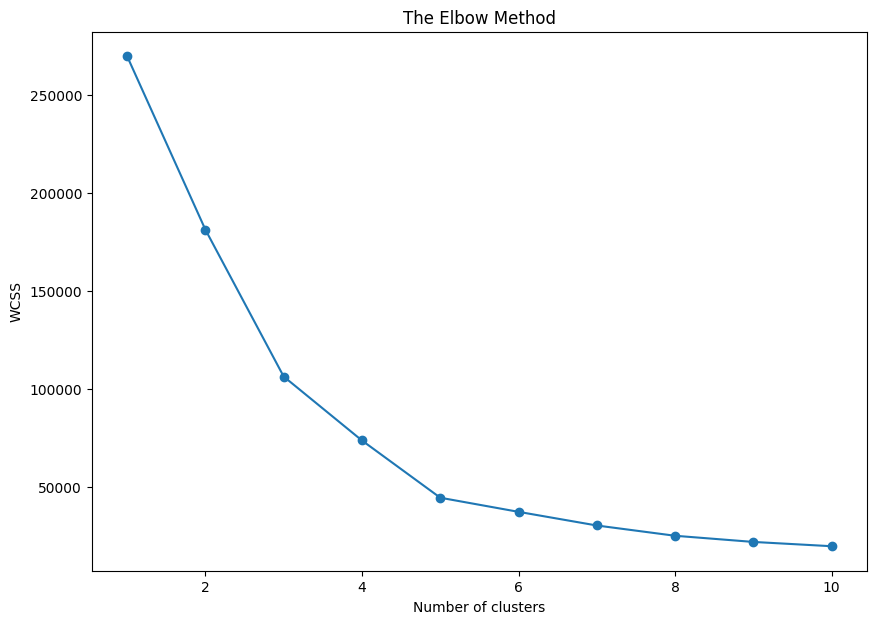

In [68]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 0:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df.iloc[:, 0:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


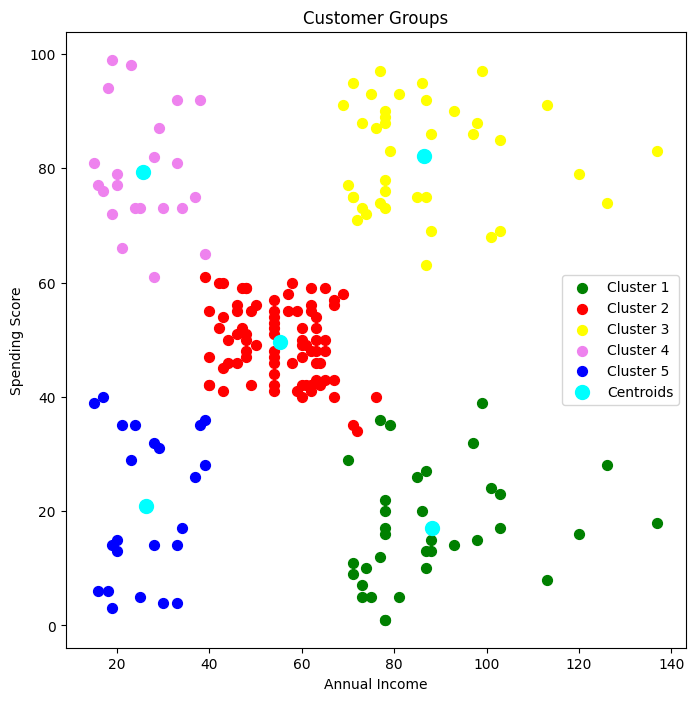

In [78]:

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=50, c='blue', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [79]:
import ipywidgets as widgets
from IPython.display import display


In [84]:
def plot_kmeans_clusters(k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(df)

    plt.figure(figsize=(8, 8))
    for i in range(k):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, label=f'Cluster {i+1}')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')
    plt.title(f'KMeans Clustering with {k} clusters')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

k_widget = widgets.IntSlider(min=2, max=10, step=1, value=5, description='Number of Clusters:')


widgets.interactive(plot_kmeans_clusters, k=k_widget)

interactive(children=(IntSlider(value=5, description='Number of Clusters:', max=10, min=2), Output()), _dom_cl…